### K-Means method

In [1]:
import numpy as np
 
import pandas as pd

import seaborn as sb

import matplotlib.pyplot as plt
from pylab import rcParams

import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale

import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
%matplotlib inline
rcParams['figure.figsize']=7,4
sb.set_style('darkgrid')

In [3]:
iris = datasets.load_iris()

x = scale(iris.data)

y = pd.DataFrame(iris.target)
variable_causes = iris.feature_names

In [4]:
clustering = KMeans(n_clusters=3,random_state = 5)
clustering.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=5, tol=0.0001, verbose=0)

#### Plotting your model outputs

In [5]:
iris_df = pd.DataFrame(iris.data)
iris_df.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y.columns=['Targets']

Text(0.5,1,'K-Means Classification')

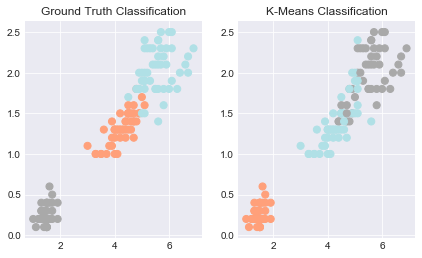

In [6]:
color_theme = np.array(['darkgray','lightsalmon','powderblue'])

plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c  = color_theme[iris.target],s=50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c  = color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification')


Text(0.5,1,'K-Means Classification')

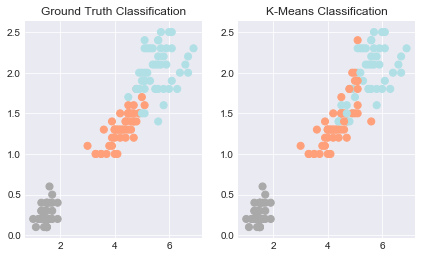

In [7]:
relabel = np.choose(clustering.labels_,[2,0,1]).astype(np.int64)

plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c  = color_theme[iris.target],s=50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c  = color_theme[relabel],s=50)
plt.title('K-Means Classification')

#### Evaluate your clustering results

In [8]:
print(classification_report(y,relabel))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.74      0.78      0.76        50
          2       0.77      0.72      0.74        50

avg / total       0.83      0.83      0.83       150



In [9]:
print(classification_report(y,clustering.labels_))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        50
          1       0.00      0.00      0.00        50
          2       0.26      0.28      0.27        50

avg / total       0.09      0.09      0.09       150

